In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphlab as gl
%matplotlib inline

[INFO] Start server at: ipc:///tmp/graphlab_server-47519 - Server binary: /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1426380494.log
[INFO] GraphLab Server Version: 1.3.0


In [2]:
# Load necessary data
lenders = pd.read_csv('data/lenders.csv', delimiter=',')
loans = pd.read_csv('data/loans.csv', delimiter=',')

In [3]:
# clean up extra headers in loans and lenders
loans = loans[loans['activity']!='activity']
lenders = lenders[lenders['lender_id'] != 'lender_id']

##Success and faillure from loan's eyes
**Success**: fully-funded, including *paid, in_repayment, funded, defaulted*.

**Failure**: not fully-funded, including *expired, inactive_expired*.

In [293]:
success_amount = loans[(loans['status']=='paid') |
                       (loans['status']=='in_repayment') |
                       (loans['status']=='funded') |
                       (loans['status']=='defaulted')].shape[0]

fail_amount = loans[(loans['status']=='expired') |
                    (loans['status']=='inactive_expired')].shape[0]

success_and_fail = success_amount + fail_amount

success_rate = success_amount / float(success_and_fail)
fail_rate = 1 - success_rate

In [294]:
print success_amount
print success_rate
print fail_amount
print fail_rate

793685
0.960405660172
32721
0.0395943398281


## Loan amount distribution

In [290]:
loan_count = lenders['loan_count'].astype(int)
loan_count.describe()

**Average lendings for each lender is around 11**

**Median lendings for each lender is 1**

In [291]:
lenders['loan_count'].describe()

count    1614189.000000
mean          10.965074
std          190.457299
min            0.000000
25%            0.000000
50%            1.000000
75%            5.000000
max       127554.000000
Name: loan_count, dtype: float64

In [ ]:
mean_loan_count = loan_count.mean()
median_loan_count = loan_count.median()
print 'Average loans for each lender: ', mean_loan_count
print 'Median loans for each lender: ', median_loan_count

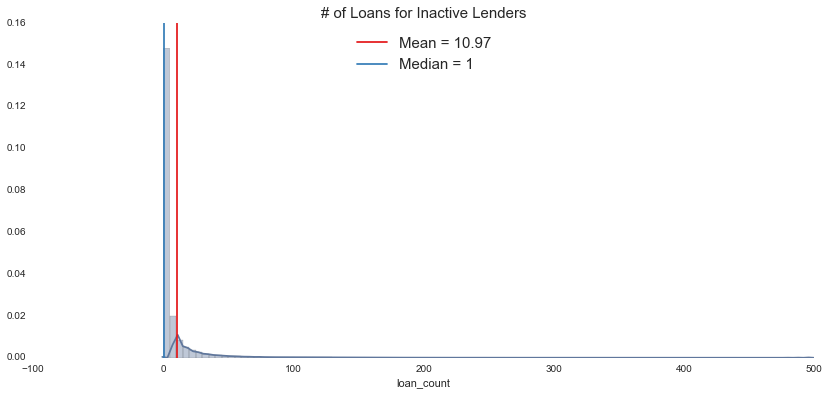

In [343]:
c1, c2 = sns.color_palette("Set1", 2)
fig = plt.figure(figsize=(14,6))
sns.distplot(loan_count[loan_count<500], bins=100, hist_kws={"normed": True})
plt.axvline(mean_loan_count, label="Mean = 10.97", c=c1)
# plt.annotate(mean_lender_count)
plt.axvline(median_loan_count, label="Median = 1", c=c2)
# plt.annotate(median_lender_count)
plt.legend(loc='upper center', fontsize=15)
plt.title("# of Loans for Inactive Lenders", fontsize=15)

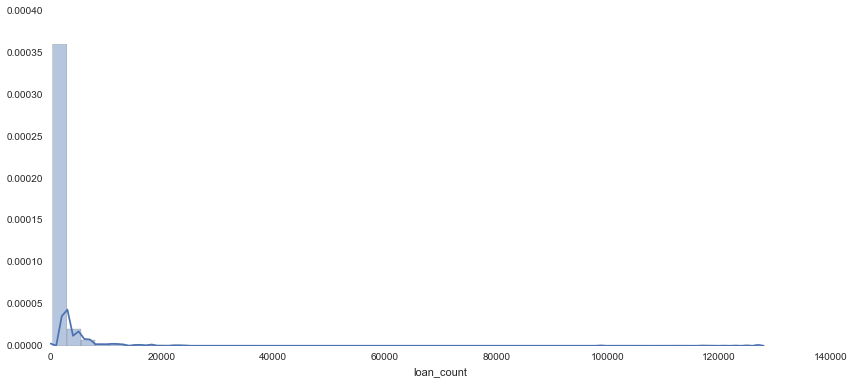

In [9]:
# plot loan_counts that are larger than 500
# aka. the active lenders
fig = plt.figure(figsize=(14,6))
sns.distplot(loan_count[loan_count>500], bins=50, hist_kws={"normed": True})

##Lender count distribution

In [295]:
loans['lender_count'] = loans['lender_count'].astype(int)

In [296]:
loans['lender_count'].describe()

count    841160.000000
mean         23.899098
std          26.605338
min           0.000000
25%           9.000000
50%          17.000000
75%          29.000000
max        2986.000000
Name: lender_count, dtype: float64

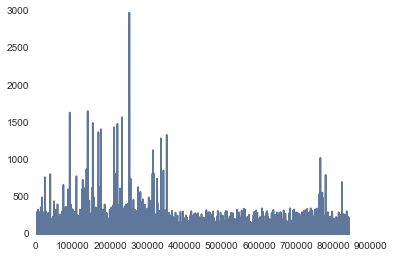

In [297]:
plt.plot(loans['lender_count'])

In [327]:
mean_lender_count = loans['lender_count'].mean()
median_lender_count = loans['lender_count'].median()
print 'Average lenders for each loan: ', mean_lender_count
print 'Median lenders for each loan: ', median_lender_count

Average lenders for each loan:  23.8990976746
Median lenders for each loan:  17.0


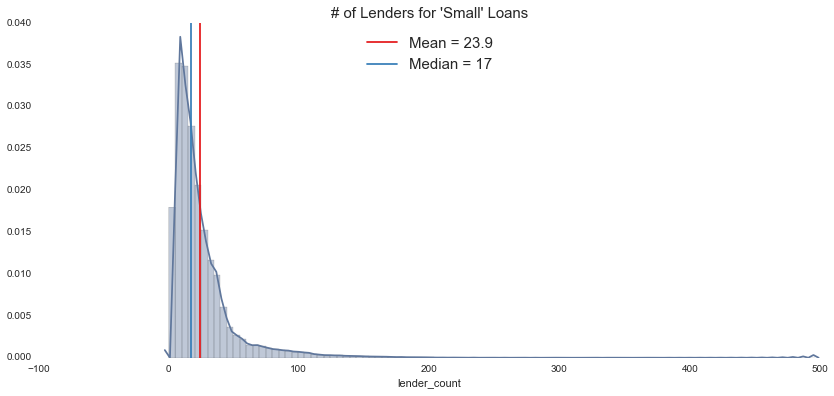

In [330]:
c1, c2 = sns.color_palette("Set1", 2)
fig = plt.figure(figsize=(14,6))
sns.distplot(loans[loans['lender_count']<500]['lender_count'], bins=100,
             hist_kws={"normed": True})
plt.axvline(mean_lender_count, label="Mean = 23.9", c=c1)
# plt.annotate(mean_lender_count)
plt.axvline(median_lender_count, label="Median = 17", c=c2)
# plt.annotate(median_lender_count)
plt.legend(loc='upper center', fontsize=15)
plt.title("# of Lenders for 'Small' Loans", fontsize=15)

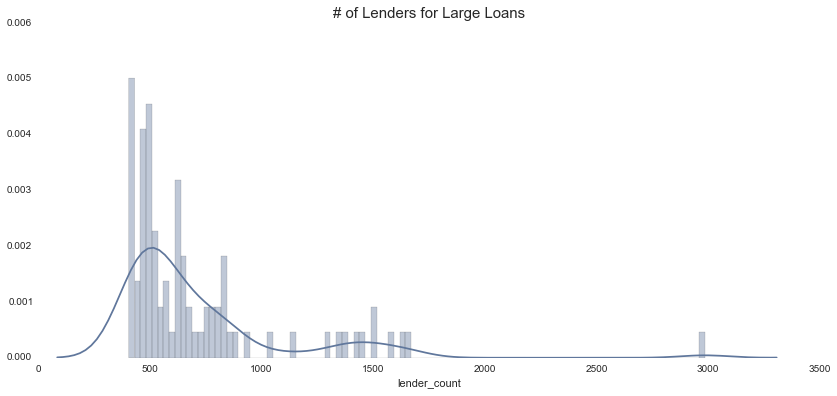

In [326]:
# c1, c2 = sns.color_palette("Set1", 2)
fig = plt.figure(figsize=(14,6))
sns.distplot(loans[loans['lender_count']>400]['lender_count'], bins=100,
             hist_kws={"normed": True})
# plt.axvline(mean_lender_count, label="Mean", c=c1)
# plt.annotate(mean_lender_count)
# plt.axvline(median_lender_count, label="Median", c=c2)
# plt.annotate(median_lender_count)
# plt.legend(loc='upper center', fontsize=15)
plt.title('# of Lenders for Large Loans', fontsize=15)

##lender count of loan by gender

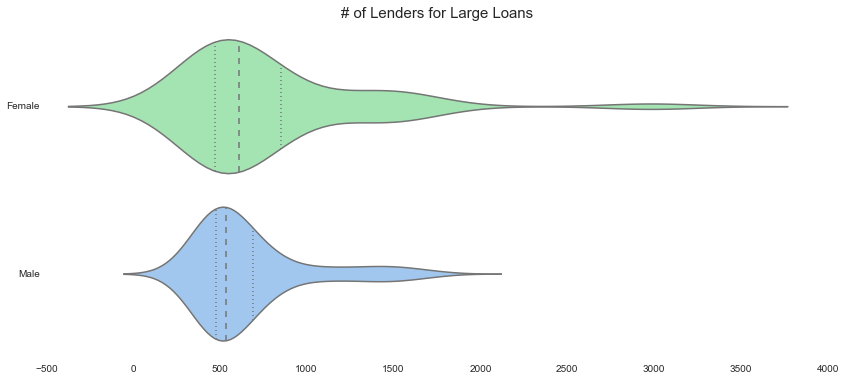

In [301]:
fig = plt.figure(figsize=(14,6))
lender_count_male = loans[(loans['gender']=='M') & (loans['lender_count'] > 400)]['lender_count']
lender_count_female = loans[(loans['gender']=='F') & (loans['lender_count'] > 400)]['lender_count']
sns.violinplot([lender_count_male, lender_count_female], names=["Male", "Female"], color="pastel", vert=False)
plt.title('# of Lenders for Large Loans', fontsize=15)

##lender count of loan by time

In [302]:
# clean and get data
lender_count_heat_year_month = loans[['lender_count', 'country', 'posted_date']]
lender_count_heat_year_month['posted_date'] = \
    lender_count_heat_year_month['posted_date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M:%SZ'))
lender_count_heat_year_month.dropna(inplace=True)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [303]:
lender_count_heat_year_month['year'] = lender_count_heat_year_month['posted_date'].map(lambda x: int(x.year))
lender_count_heat_year_month['month'] = lender_count_heat_year_month['posted_date'].map(lambda x: int(x.month))
lender_count_heat_year_month = \
    lender_count_heat_year_month.groupby(['year', 'month'], as_index=False).aggregate(np.mean)
lender_count_heat_year_month = lender_count_heat_year_month.pivot("month", "year", "lender_count")
lender_count_heat_year_month.fillna(0, inplace=True)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


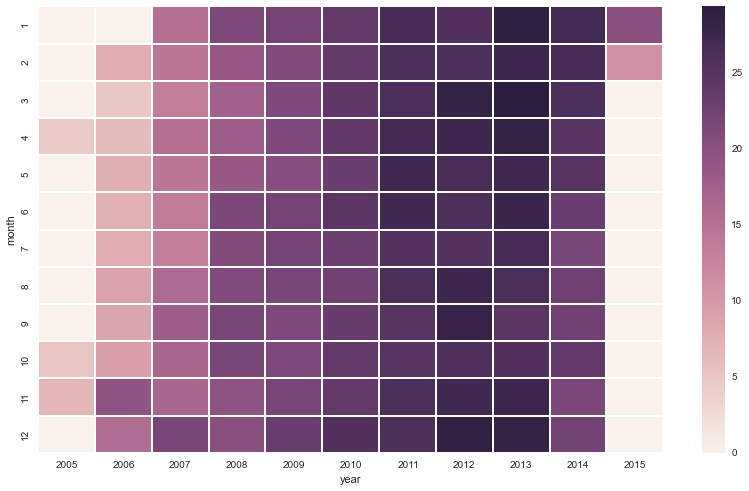

In [304]:
fig = plt.figure(figsize=(14, 8))
sns.heatmap(lender_count_heat_year_month)